In [1]:
# import general packages, check folders
#%reset
import os
import numpy as np
import h5py
import pandas as pd
#import imagesc as imagesc #pip install imagesc
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import time
from pathlib import Path

# TO DO - REMOVE THE UNNECESSARY LIBRARY IMPORTS

%matplotlib inline

working_dir = '/Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/fMRIScipts/code'
#working_dir = os.getcwd()
print('current directory:\n',working_dir)
path = Path(working_dir)
parent_folder = path.parent
#print('parent folder:', parent_folder)
data_file_loc = os.path.join(parent_folder,'data') # to store data we extract later in this notebook

current directory:
 /Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/fMRIScipts/code


In [2]:
# setting default fontsizes for plots

s=16 # CHANGE FONTSIZE HERE

plt.rc('font', size=s) #controls default text size
plt.rc('axes', titlesize=s) #fontsize of the title
plt.rc('axes', labelsize=s) #fontsize of the x and y labels
plt.rc('xtick', labelsize=s) #fontsize of the x tick labels
plt.rc('ytick', labelsize=s) #fontsize of the y tick labels
plt.rc('legend', fontsize=s) #fontsize of the legend
#import matplotlib as mpl
#mpl.rcParams['font.weight']= 'normal'


In [3]:
# load behavioral data - coded 1 for "social", 0 for "nonsocial" and 9 for "unsure", nan for missed response
responses = np.load(os.path.join(data_file_loc,'responses.npy'))
responses.shape # subs *movies

(1048, 10)

In [4]:
vidnames = ["COAXING-B", "BILLIARD-A", "DRIFTING-A", "Fishing", "Random mechanical","Scaring", "SEDUCING-B", "STAR-A", "SURPRISING-B", "TENNIS-A"]
vidnames

['COAXING-B',
 'BILLIARD-A',
 'DRIFTING-A',
 'Fishing',
 'Random mechanical',
 'Scaring',
 'SEDUCING-B',
 'STAR-A',
 'SURPRISING-B',
 'TENNIS-A']

In [5]:
from mne.stats import fdr_correction
from multipy.fdr import lsu
#from multipy.data import neuhaus

#pvals = neuhaus()
#significant_pvals = lsu(pvals, q=0.05)
#print(zip(['{:.4f}'.format(p) for p in pvals], significant_pvals))


# (1) social v unsure v nonsocial

## Random Mech

In [69]:
movie_ind = 4
coef_slope_rand = np.load(os.path.join(data_file_loc,'coef_slopereg_runnorm_Random mechanical.npy'))

soc_inds = responses[:,movie_ind]==1 # subs who responded "social"
nonsoc_inds = responses[:,movie_ind]==0 # subs who respoded "nonsocial"
unsure_inds = responses[:,movie_ind]==9 # subs who respoded "unsure"

print(f'movie={vidnames[movie_ind]},soc={len(np.where(soc_inds)[0])},nonsocial={len(np.where(nonsoc_inds)[0])},unsure={len(np.where(unsure_inds)[0])}')

# ttest between slope regs yes vs. no
_,pval_slope_rand_S_NS = stats.ttest_ind(coef_slope_rand[soc_inds,:], coef_slope_rand[nonsoc_inds,:],axis=0, equal_var=False)
pval_slope_rand_S_NS = lsu(pval_slope_rand_S_NS,q=.05)#fdr_correction(pval_slope_rand,.05)
meanDiff_sl_rand_S_NS = np.nanmean(coef_slope_rand[soc_inds,:],axis=0)-np.nanmean(coef_slope_rand[nonsoc_inds,:],axis=0)

# ttest between slope regs yes vs. unsure
_,pval_slope_rand_S_UNS_unc = stats.ttest_ind(coef_slope_rand[soc_inds,:], coef_slope_rand[unsure_inds,:],axis=0, equal_var=False)
pval_slope_rand_S_UNS = lsu(pval_slope_rand_S_UNS_unc,q=.05)#fdr_correction(pval_slope_rand,.05)
meanDiff_sl_rand_S_UNS = np.nanmean(coef_slope_rand[soc_inds,:],axis=0)-np.nanmean(coef_slope_rand[unsure_inds,:],axis=0)

# ttest between slope regs unsure vs. no
_,pval_slope_rand_UNS_NS_unc = stats.ttest_ind(coef_slope_rand[unsure_inds,:], coef_slope_rand[nonsoc_inds,:],axis=0, equal_var=False)
pval_slope_rand_UNS_NS = lsu(pval_slope_rand_UNS_NS_unc,q=.05)#fdr_correction(pval_slope_rand,.05)
meanDiff_sl_rand_UNS_NS = np.nanmean(coef_slope_rand[unsure_inds,:],axis=0)-np.nanmean(coef_slope_rand[nonsoc_inds,:],axis=0)




movie=Random mechanical,soc=88,nonsocial=587,unsure=186


In [70]:
pval_slope_rand_UNS_NS_unc = pval_slope_rand_UNS_NS_unc<.05
pval_slope_rand_S_UNS_unc = pval_slope_rand_S_UNS_unc < .05

In [71]:
# social>unsure and unsure>non-social or vice-versa
nodes_rand_SUNS_UNSNS = (pval_slope_rand_S_UNS) & (pval_slope_rand_UNS_NS) & (np.sign(meanDiff_sl_rand_S_UNS) == np.sign(meanDiff_sl_rand_UNS_NS)) 
print('nodes_rand_SUNS_UNSNS:',len(np.where(nodes_rand_SUNS_UNSNS)[0]))

#### same as above, unc.
# social>unsure and unsure>non-social or vice-versa uncorrected
nodes_rand_SUNS_UNSNS_unc = (pval_slope_rand_S_UNS_unc) & (pval_slope_rand_UNS_NS_unc) & (np.sign(meanDiff_sl_rand_S_UNS) == np.sign(meanDiff_sl_rand_UNS_NS)) 
print('nodes_rand_SUNS_UNSNS_unc:',len(np.where(nodes_rand_SUNS_UNSNS_unc)[0]))


nodes_rand_SUNS_UNSNS: 0
nodes_rand_SUNS_UNSNS_unc: 14


In [10]:
#### social>(NS and unsure) or vice-versa
# # social>nonsocial and social>unsure or vice-versa
nodes_rand_SNS_SUNS = (pval_slope_rand_S_NS) & (pval_slope_rand_S_UNS) & (np.sign(meanDiff_sl_rand_S_NS) == np.sign(meanDiff_sl_rand_S_UNS)) 
print('nodes_rand_SNS_SUNS:',len(np.where(nodes_rand_SNS_SUNS)[0]))


nodes_rand_SNS_SUNS: 13


- overall, 13 nodes show S>NS and S>unsure,
- but no nodes show S>unsure>NS even at uncorrected threshold


## Plot figs for RAND


In [50]:
def plot_fig(X,Y,xlabel,ylabel,xymin,xymax):
    #X = stats.zscore(X)
    #X = X/np.nanstd(X)
    #Y = stats.zscore(Y)
    #Y = Y/np.nanstd(Y)
    plt.plot(X,Y,ls='None',marker='.',alpha = .5,color='grey',label = 'mean diff. per node',markersize=8)
    r,p = stats.pearsonr(X,Y)
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
   
    #plt.xlabel(xlabel+'/std')
    #plt.ylabel(ylabel+'/std')
    #xmin,xmax = plt.xlim()
    #ymin,ymax = plt.ylim()
    #xymin = min(xmin,ymin)
    #xymax = max(xmax,ymax)

    plt.xlim(xymin,xymax)
    plt.ylim(xymin,xymax)


    xpos = xymin+ .05*(xymax-xymin)
    ypos = xymin+ .8*(xymax-xymin)
    plt.text(xpos,ypos,f'r={r:.2f},\np={p:.1e}',fontsize=20)

    
#def best_fit_line(X,Y):
    m, b = np.polyfit(X,Y, 1)
    print(np.poly1d([m,b]))
    xplot = np.linspace(xymin,xymax,10)
    plt.plot(xplot, m*xplot + b,ls='dashed',color = 'k',label = 'line of best fit\n(all nodes)')
    #plt.title(np.poly1d([m,b]))

    #plt.text(xymin,.7*xymax,f'sl.={m:.2f},\nint.={b:.2f}')
    plt.vlines(0,xymin,xymax,color = 'grey',ls = 'dashed',alpha = .4)
    plt.hlines(0,xymin,xymax,color = 'grey',ls = 'dashed',alpha = .4)
   

def plot_sig_nodes(X,Y,inds):
    #X = stats.zscore(X)
    #X = X/np.nanstd(X)
    #Y = stats.zscore(Y)
    #Y = Y/np.nanstd(Y)
    plt.plot(X[inds],Y[inds],ls='None',marker='+',
    mfc='k', mec='k',mew = 3, linewidth = 5,label = 'sig. across both axes',ms=12)
    #plt.plot(X[nodes_coaxbill_rand_all_fish],Y[nodes_coaxbill_rand_all_fish],ls='None',marker='D',
    #mfc='g', mec='g',label = 'sig. across all\ncomparisons',ms=10)
    

## Plot brainmaps for RAND S>Unsure >NS

In [14]:
#import plotting functions

from nltools.data import Brain_Data
from nltools.mask import expand_mask, roi_to_brain
from nilearn.plotting import plot_glass_brain
import nibabel as nib
from nilearn.plotting import plot_stat_map

mask = Brain_Data('https://neurovault.org/media/images/8423/shen_2mm_268_parcellation.nii.gz')
mask_x = expand_mask(mask)


lbl = [str.upper(x[0:4]) for x in vidnames]
#lbl

In [15]:
shen268_lbl = pd.read_csv(os.path.join(data_file_loc,"shen_dictionary.csv"))
shen268_lbl

,1,2,3,4,5,6,7,8,9,10,...,259,260,261,262,263,264,265,266,267,268
0,"{'coords': [14.083200000000005, 56.6944, -16.6...","{'coords': [9.599999999999994, 17.618823529411...","{'coords': [5.270633397312864, 35.032629558541...","{'coords': [15.647840531561457, 34.18604651162...","{'coords': [8.283887468030684, 46.058823529411...","{'coords': [14.581460674157299, 64.75280898876...","{'coords': [30.41914191419142, 54.795379537953...","{'coords': [44.469325153374236, 46.09509202453...","{'coords': [28.814814814814817, 51.16316316316...","{'coords': [8.521081081081078, 53.28, 23.88540...",...,"{'coords': [-10.399527186761233, 10.8770685579...","{'coords': [-14.491582491582491, -3.5488215488...","{'coords': [-24.77079107505071, 5.537525354969...","{'coords': [-9.427230046948353, -25.5399061032...","{'coords': [-4.68474576271187, -10.24067796610...","{'coords': [-11.407792207792212, -25.563636363...","{'coords': [-4.821052631578951, -21.5115789473...","{'coords': [-4.227272727272734, -37.8977272727...","{'coords': [-6.9375, -33.13068181818181, -39.3...","{'coords': [-5.697885196374628, -18.9667673716..."


In [16]:
def color_rois(values):
    
    """
    This function assumes you are passing a vector "values" with the same length as the number of nodes in the atlas.
    """
    shen268 = nib.load(os.path.join(data_file_loc,"shen_2mm_268_parcellation.nii.gz"))
    shen268_data = shen268.get_fdata()
    img = np.zeros(shen268_data.shape)
    #print(shen268_data.shape)
    for roi in range(len(values)):
        itemindex = np.where(shen268_data==roi+1) # find voxels in this node (add 1 to account for zero-indexing)
        #print(len(itemindex[0]))
        img[itemindex] = values[roi] # color them by the desired value 

    affine = shen268.affine
    img_nii = nib.Nifti1Image(img, affine)
    
    return img_nii

In [17]:
cols = ['k','k','g']
lw = [3,2,1]


In [18]:
# for comparison with the other main figure if needed
#nodes_coaxbill_rand_all = np.load(os.path.join(data_file_loc,'nodes_coaxbill_rand_all.npy')) # sig nodes hihglighted in the first S>NS GLM
#nodes_randuns_all = nodes_coaxbill_rand_all & nodes_rand_SNS_SUNS
#len(np.where(nodes_randuns_all)[0])

<Figure size 720x216 with 0 Axes>

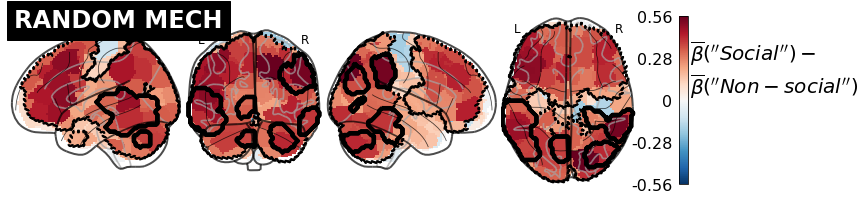

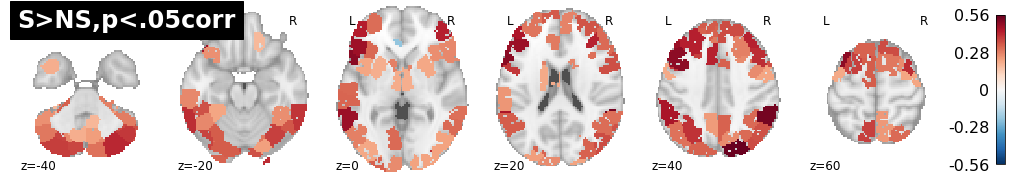

In [26]:
txt = r"$\overline{\beta}(''Social'')-$" + '\n' + r"$\overline{\beta}(''Non-social'')$"
#txt = 'RANDOM MECH [' + r'$\overline{\beta}_{social}-\overline{\beta}_{nonsocial}$' + ']'
#img.plot(colorbar=True, title = txt,cmap = 'RdBu_r',symmetric_cbar = False)
img = roi_to_brain(pd.Series(meanDiff_sl_rand_S_NS), mask_x)
fig=plt.figure(2,figsize=((10,3)))
glassb = plot_glass_brain(img.to_nifti(), symmetric_cbar = True,
                display_mode='lyrz', plot_abs=False, black_bg=False,cmap = 'RdBu_r',colorbar = True,vmin=vmin,vmax=vmax)
#glassb.title(txt,fontsize=24,bgcolor='k',color='w',fontweight='bold')
glassb.title("RANDOM MECH",fontsize=24,bgcolor='k',color='w',fontweight='bold')
glassb._colorbar_ax.text(0.9,0.2,txt,fontsize=20,fontdict = {'verticalalignment':'center','rotation':0})#get_legend()
#glassb._colorbar_ax.set_title(txt,fontsize=20)#get_legend()
#glassb._colorbar_ax.set_position([0.999,0.01,.05,.95])
#glassb._colorbar_ax.orientation = 'vertical'#glassb._colorbar_ax.set_snap]
#glassb._colorbar_margin['top'] = .1
glassb.add_contours(color_rois(pval_slope_rand_S_NS),linewidths=lw[1], colors=[cols[1]],linestyles='dotted') #this contrast
glassb.add_contours(color_rois(nodes_rand_SNS_SUNS),linewidths=lw[0], colors=[cols[0]],linestyles='solid') # all contrasts
plt.savefig(os.path.join(fig_save_loc,'rand/soc_v_nonsoc.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')

nodes = np.zeros((268,))
nodes[pval_slope_rand_S_NS] = meanDiff_sl_rand_S_NS[pval_slope_rand_S_NS]
img = roi_to_brain(pd.Series(nodes), mask_x)
#plot_glass_brain(img.to_nifti(),symmetric_cbar = False,
#                display_mode='lyrz', plot_abs=False, black_bg=False,cmap = 'RdBu_r',colorbar = True)
ax_plot = plot_stat_map(img.to_nifti(), display_mode='z', cut_coords=10*np.arange(-4,7,2), vmax = vmax,cmap = 'RdBu_r',colorbar=True,annotate=True)
ax_plot.title('S>NS,p<.05corr',fontsize=24,bgcolor='k',color='w',fontweight='bold')

#ax_plot.title("RANDOM MECH",fontsize=24,bgcolor='k',color='w',fontweight='bold')
plt.savefig(os.path.join(fig_save_loc,'rand/soc_v_nonsoc_axial.png'),dpi=600,bbox_inches='tight',facecolor='white', edgecolor='none')


## All movies S > Unsure >NS

- for the all movies social v unsure v nonsocial analysis, we need trial-wise coeffts (the all movies analyses for the main results was from run-norm data where social and nonsocial were assigned positive and negative slopes - no way to correctly include unsure here - hence the need for trialwise reg coeffts) 

In [27]:
# first of all, best to remove subjects with < 10 responses for power in general
count_resp = np.zeros((responses.shape[0],))
for i in range(responses.shape[0]):
    count_resp[i] = len(np.where(~np.isnan(responses[i,:]))[0])
subs_10resp = np.where(count_resp == 10)[0]
len(subs_10resp)

814

In [32]:
#install lme functions
from pymer4.models import Lmer
#from pymer4.models import Lm
import time

In [31]:
# initializing arrays
coef_soc_uns, coef_uns_nonsoc, coef_soc_nonsoc,coef_unsure_sure = [np.empty((268,)) for _ in range(4)]
coef_soc_uns[:], coef_uns_nonsoc[:], coef_soc_nonsoc[:],coef_unsure_sure[:]  = [np.nan]*4

pval_soc_uns, pval_uns_nonsoc, pval_soc_nonsoc, pval_unsure_sure = [np.empty((268,)) for _ in range(4)]
pval_soc_uns[:], pval_uns_nonsoc[:], pval_soc_nonsoc[:], pval_unsure_sure[:]= [np.nan]*4

In [33]:
all_coefs = np.zeros((1048,268,10))

for m in range(10):
    fileName =  os.path.join(data_file_loc,f'coef_slopereg_trialnorm_{vidnames[m]}.npy')
    all_coefs[:,:,m] = np.load(fileName)
    #print(dat.shape)

In [34]:
other_movies = [0,1,2,3,5,6,7,8,9] # do the analyses on all movies except rand mech


In [35]:
# Yes v Unsure
start_time =  time.time()
for n in range(268):
    if n%10 == 0:
        print(f'node {n+1},time={(time.time()-start_time)/60:.2f} mins')
    
    df = pd.DataFrame(columns = ['coefs','response','subID','movie'])
    for m in other_movies:
        df_temp = pd.DataFrame({'coefs': all_coefs[subs_10resp,n,m],'response':responses[subs_10resp,m], 'subID':subs_10resp, 'movie':np.repeat(m,len(subs_10resp))})

        df = df.append(df_temp,ignore_index=True)
        df = df.loc[df['response'] != 0] # yes v unsure
    df['response'] = df['response'].map({1.0: "Social", 9.0:  "Unsure"})
    model = Lmer('coefs ~  response +(1|subID)', data=df) # ff: mean response, rf:subjID
    model.fit(factors={"response":["Unsure","Social"]},summary = False, verbose = False)
    if n == 0:
        print('model:',model.fit(factors={"response":["Unsure","Social"]}))
    coef_soc_uns[n] = model.coefs['Estimate'][1]
    pval_soc_uns[n]= model.coefs['P-val'][1]


node 1,time=0.00 mins
Formula: coefs~response+(1|subID)

Family: gaussian	 Inference: parametric

Number of observations: 4258	 Groups: {'subID': 814.0}

Log-likelihood: -5546.385 	 AIC: 11092.770

Random effects:

                 Name    Var    Std
subID     (Intercept)  0.099  0.315
Residual               0.712  0.844

No random effect correlations specified

Fixed effects:

model:              Estimate  2.5_ci  97.5_ci     SE        DF  T-stat  P-val  Sig
(Intercept)     0.260   0.160    0.359  0.051  4203.950   5.125  0.000  ***
response1       0.148   0.047    0.249  0.051  4140.588   2.883  0.004   **
node 11,time=0.09 mins
node 21,time=0.14 mins
node 31,time=0.20 mins
node 41,time=0.25 mins
node 51,time=0.30 mins
node 61,time=0.36 mins
node 71,time=0.41 mins
node 81,time=0.46 mins
node 91,time=0.51 mins
node 101,time=0.57 mins
node 111,time=0.62 mins
node 121,time=0.67 mins
node 131,time=0.72 mins
node 141,time=0.78 mins
node 151,time=0.83 mins
node 161,time=0.88 mins
node 171,

Text(0.5, 0, 'Social>Unsure')

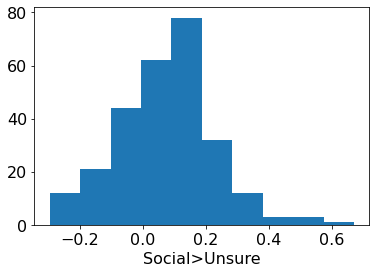

In [36]:
plt.hist(coef_soc_uns)
plt.xlabel('Social>Unsure')

In [37]:
start_time =  time.time()
for n in range(268):
    if n%10 == 0:
        print(f'node {n+1},time={(time.time()-start_time)/60:.2f} mins')
    df = pd.DataFrame(columns = ['coefs','response','subID','movie'])
    for m in other_movies:
        df_temp = pd.DataFrame({'coefs': all_coefs[subs_10resp,n,m],'response':responses[subs_10resp,m], 'subID':subs_10resp, 'movie':np.repeat(m,len(subs_10resp))})
        df = df.append(df_temp,ignore_index=True)
        df = df.loc[df['response'] != 1] # no v unsure
        
    df['response'] = df['response'].map({0.0: "Non-social", 9.0:  "Unsure"})
    model = Lmer('coefs ~  response +(1|subID)', data=df) # ff: mean response, rf:subjID
    model.fit(factors={"response":["Non-social","Unsure"]},summary = False, verbose = False)
    if n == 0:
        print(model.fit(factors={"response":["Non-social","Unsure"]}))
    #print('model 2:',model.fit())
    coef_uns_nonsoc[n] = model.coefs['Estimate'][1]
    pval_uns_nonsoc[n]= model.coefs['P-val'][1]


node 1,time=0.00 mins
Formula: coefs~response+(1|subID)

Family: gaussian	 Inference: parametric

Number of observations: 3388	 Groups: {'subID': 813.0}

Log-likelihood: -4274.594 	 AIC: 8549.187

Random effects:

                 Name    Var    Std
subID     (Intercept)  0.058  0.241
Residual               0.677  0.823

No random effect correlations specified

Fixed effects:

             Estimate  2.5_ci  97.5_ci     SE        DF  T-stat  P-val  Sig
(Intercept)     0.254   0.221    0.288  0.017   928.586  14.818  0.000  ***
response1      -0.002  -0.101    0.096  0.050  3385.610  -0.046  0.964     
node 11,time=0.06 mins
node 21,time=0.11 mins
node 31,time=0.17 mins
node 41,time=0.22 mins
node 51,time=0.27 mins
node 61,time=0.33 mins
node 71,time=0.39 mins
node 81,time=0.45 mins
node 91,time=0.52 mins
node 101,time=0.57 mins
node 111,time=0.62 mins
node 121,time=0.68 mins
node 131,time=0.73 mins
node 141,time=0.78 mins
node 151,time=0.83 mins
node 161,time=0.88 mins
node 171,time=0.9

(array([ 6., 19., 27., 45., 53., 46., 36., 18., 16.,  2.]),
 array([-0.24612227, -0.18103109, -0.11593992, -0.05084874,  0.01424243,
         0.07933361,  0.14442478,  0.20951595,  0.27460713,  0.3396983 ,
         0.40478948]),
 <BarContainer object of 10 artists>)

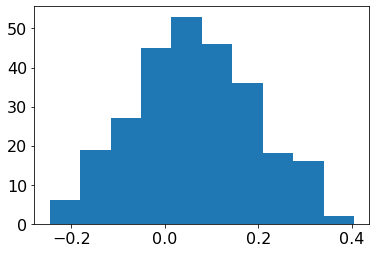

In [38]:
plt.hist(coef_uns_nonsoc)

In [327]:
# soc vs. nonsocial. run if needed
'''start_time =  time.time()

for n in range(268):
    if n%10 == 0:
        print(f'node {n+1},time={(time.time()-start_time)/60:.2f} mins')
    df = pd.DataFrame(columns = ['coefs','response','subID','movie'])
    for m in other_movies:
        dat = all_coefs[:,n,m]
        df_temp = pd.DataFrame({'coefs': all_coefs[subs_10resp,n,m],'response':responses[subs_10resp,m], 'subID':subs_10resp, 'movie':np.repeat(m,len(subs_10resp))})
        df = df.append(df_temp,ignore_index=True)
        df = df.loc[df['response'] != 9] # yes v no
    
    df['response'] = df['response'].map({0.0: "Non-social", 1.0:  "Social"})
    model = Lmer('coefs ~  response +(1|subID)', data=df) # ff: mean response, rf:subjID
    model.fit(factors={"response":["Non-social","Social"]},summary = False, verbose = False)
    if n == 0:
        print(model.fit(factors={"response":["Non-social","Social"]}))
   
    #model.fit(summary = False, verbose = False)
    coef_soc_nonsoc[n] = model.coefs['Estimate'][1]
    pval_soc_nonsoc[n]= model.coefs['P-val'][1]'''


node 1,time=0.00 mins
Formula: coefs~response+(1|subID)

Family: gaussian	 Inference: parametric

Number of observations: 7006	 Groups: {'subID': 814.0}

Log-likelihood: -8981.271 	 AIC: 17962.541

Random effects:

                 Name    Var    Std
subID     (Intercept)  0.067  0.258
Residual               0.709  0.842

No random effect correlations specified

Fixed effects:

             Estimate  2.5_ci  97.5_ci     SE        DF  T-stat  P-val  Sig
(Intercept)     0.253   0.218    0.288  0.018  2178.533  14.266    0.0  ***
response1       0.155   0.115    0.194  0.020  6322.998   7.588    0.0  ***
node 11,time=0.08 mins
node 21,time=0.15 mins
node 31,time=0.21 mins
node 41,time=0.28 mins
node 51,time=0.36 mins
node 61,time=0.44 mins
node 71,time=0.54 mins
node 81,time=0.64 mins
node 91,time=0.71 mins
node 101,time=0.79 mins
node 111,time=0.85 mins
node 121,time=0.92 mins
node 131,time=0.99 mins
node 141,time=1.06 mins
node 151,time=1.12 mins
node 161,time=1.20 mins
node 171,time=1.

In [40]:
# FDR-correct all three

pval_soc_uns = lsu(pval_soc_uns,q=.05)
pval_uns_nonsoc = lsu(pval_uns_nonsoc,q=.05)
#pval_soc_nonsoc = lsu(pval_soc_nonsoc,q=.05)


In [41]:
# social>unsure and unsure>non-social or vice-versa
nodes_all_SUNS_UNSNS = (pval_soc_uns) & (pval_uns_nonsoc) & (np.sign(coef_soc_uns) == np.sign(coef_uns_nonsoc)) 
len(np.where(nodes_all_SUNS_UNSNS)[0])

55

In [102]:
# nodes common to RANDOM MECH and ALL OTHER MOVIES
common_nodes_soc_uns_nonsoc =  nodes_rand_SUNS_UNSNS_unc & nodes_all_SUNS_UNSNS

In [200]:
rois = [eval(shen268_lbl[str(n+1)][0])['name'] for n in np.where(common_nodes_soc_uns_nonsoc)[0]]
for i,roi in enumerate(rois):
    print(np.where(common_nodes_soc_uns_nonsoc)[0][i],roi)
print(f'\n\n{len(rois)} ROIs sig. at p-value threshold .05\n')

65 35.14% Inferior_Temporal_Gyrus_temporooccipital_part; 29.73% Lateral_Occipital_Cortex_inferior_division; 27.48% Temporal_Occipital_Fusiform_Cortex; 7.66% Occipital_Fusiform_Gyrus
66 54.07% Occipital_Fusiform_Gyrus; 28.60% Lateral_Occipital_Cortex_inferior_division; 14.90% Temporal_Occipital_Fusiform_Cortex
68 48.69% Middle_Temporal_Gyrus_temporooccipital_part; 29.07% Lateral_Occipital_Cortex_inferior_division; 22.09% Inferior_Temporal_Gyrus_temporooccipital_part
80 55.16% Occipital_Pole; 38.06% Lateral_Occipital_Cortex_inferior_division; 6.78% Occipital_Fusiform_Gyrus
150 51.03% Frontal_Orbital_Cortex; 25.77% Inferior_Frontal_Gyrus_pars_triangularis; 11.73% Frontal_Pole; 8.38% Frontal_Operculum_Cortex


5 ROIs sig. at p-value threshold .05



## Plot RAND MECH

In [169]:
fig_save_loc = os.path.join('/Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/paper_prep/figures/fig4_soc_unsure_nonsoc_figs3,4/unsure_analyses/')


In [197]:
coords = [np.round(eval(shen268_lbl[str(n+1)][0])['coords'][2]) for n in np.where(common_nodes_soc_uns_nonsoc)[0]]
coords

[-15.0, -17.0, -5.0, -11.0, -7.0]

S v. NS: -0.21967760413929693 0.5530003259733406
S v. unsure: -0.15130952949741164 0.42701490941386777
unsure v. NS: -0.2680918086349059 0.25409751320748153


<Figure size 720x216 with 0 Axes>

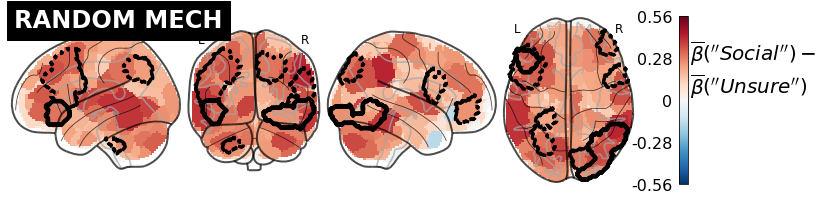

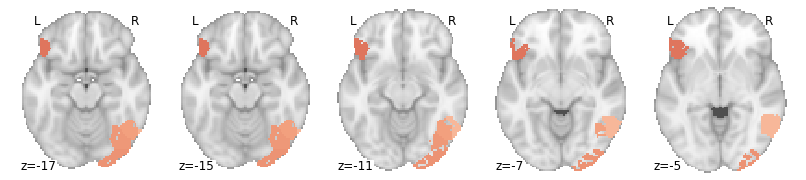

In [214]:
print('S v. NS:', min(meanDiff_sl_rand_S_NS), max(meanDiff_sl_rand_S_NS))
print('S v. unsure:', min(meanDiff_sl_rand_S_UNS), max(meanDiff_sl_rand_S_UNS))
print('unsure v. NS:', min(meanDiff_sl_rand_UNS_NS), max(meanDiff_sl_rand_UNS_NS))

vmin,vmax = -.27,.56

# Social vs. Unsure

txt = r"$\overline{\beta}(''Social'')-$" + '\n' + r"$\overline{\beta}(''Unsure'')$"
#txt = 'RANDOM MECH [' + r'$\overline{\beta}_{social}-\overline{\beta}_{nonsocial}$' + ']'
#img.plot(colorbar=True, title = txt,cmap = 'RdBu_r',symmetric_cbar = False)
img = roi_to_brain(pd.Series(meanDiff_sl_rand_S_UNS), mask_x)
fig=plt.figure(2,figsize=((10,3)))
fig=plt.figure(2,figsize=((10,3)))
glassb = plot_glass_brain(img.to_nifti(),symmetric_cbar = True,
                display_mode='lyrz', plot_abs=False, black_bg=False,cmap = 'RdBu_r',colorbar = True,vmin=vmin,vmax=vmax)
glassb.title("RANDOM MECH",fontsize=24,bgcolor='k',color='w',fontweight='bold')
glassb._colorbar_ax.text(0.9,0.2,txt,fontsize=20,fontdict = {'verticalalignment':'center','rotation':0})#get_legend()
#glassb._colorbar_ax.set_title(txt,fontsize=20)#get_legend()
#glassb.title(txt,fontsize=24,bgcolor='k',color='w',fontweight='bold')
#glassb.add_contours(color_rois(pval_slope_rand_S_UNS),linewidths=lw[1], colors=[cols[1]],linestyles='dotted')
#glassb.add_contours(color_rois(pval_slope_rand_S_UNS_unc),linewidths=lw[1], colors=[[.4,.4,.4,1]],linestyles='dotted')
#glassb.add_contours(color_rois(nodes_rand_SNS_SUNS),linewidths=lw[0], colors=[cols[0]],linestyles='solid')
glassb.add_contours(color_rois(nodes_rand_SUNS_UNSNS_unc),linewidths=lw[0], colors=[cols[0]],linestyles='dotted')
glassb.add_contours(color_rois(common_nodes_soc_uns_nonsoc),linewidths=lw[0], colors=[cols[0]],linestyles='solid')
plt.savefig(os.path.join(fig_save_loc,'rand/soc_v_unsure.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')


nodes = np.zeros((268,))
nodes[common_nodes_soc_uns_nonsoc] = meanDiff_sl_rand_S_UNS[common_nodes_soc_uns_nonsoc]
img = roi_to_brain(pd.Series(nodes), mask_x)
#plot_glass_brain(img.to_nifti(),symmetric_cbar = False,
#                display_mode='lyrz', plot_abs=False, black_bg=False,cmap = 'RdBu_r',colorbar = True)
ax_plot = plot_stat_map(img.to_nifti(), display_mode='z', cut_coords=coords, vmax = vmax,cmap = 'RdBu_r',colorbar=False,annotate=True)
#ax_plot.title('S>Uns,p<.05corr.',fontsize=24,bgcolor='k',color='w',fontweight='bold')
#ax_plot.title("RANDOM MECH",fontsize=24,bgcolor='k',color='w',fontweight='bold')
plt.savefig(os.path.join(fig_save_loc,'rand/soc_v_unsure_axial.png'),dpi=600,bbox_inches='tight',facecolor='white', edgecolor='none')


<Figure size 720x216 with 0 Axes>

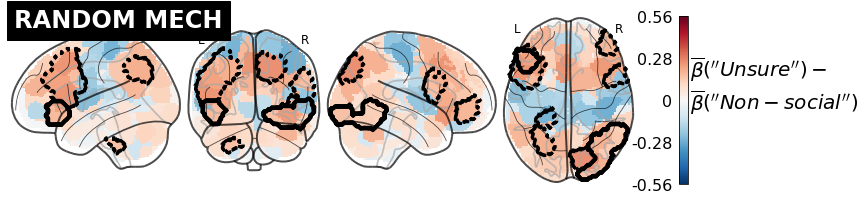

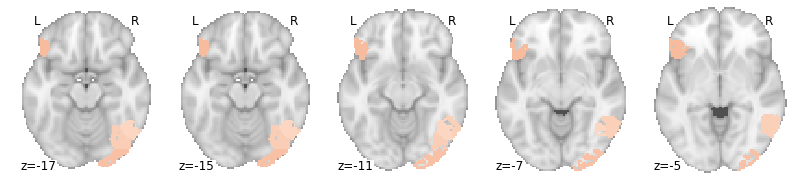

In [215]:
vmin,vmax = -.27,.56

# Rand Unsure >Nonsocial
txt = r"$\overline{\beta}(''Unsure'')-$" + "\n" + r"$\overline{\beta}(''Non-social'')$"
#txt = 'RANDOM MECH [' + r'$\overline{\beta}_{social}-\overline{\beta}_{nonsocial}$' + ']'
#img.plot(colorbar=True, title = txt,cmap = 'RdBu_r',symmetric_cbar = False)
img = roi_to_brain(pd.Series(meanDiff_sl_rand_UNS_NS), mask_x)
fig=plt.figure(2,figsize=((10,3)))
glassb = plot_glass_brain(img.to_nifti(),vmin=-vmin,vmax=vmax, symmetric_cbar = True,
                display_mode='lyrz', plot_abs=False, black_bg=False,cmap = 'RdBu_r',colorbar = True)
glassb.title("RANDOM MECH",fontsize=24,bgcolor='k',color='w',fontweight='bold')
glassb._colorbar_ax.text(0.9,0.1,txt,fontsize=20,fontdict = {'verticalalignment':'center','rotation':0})#get_legend()
#glassb._colorbar_ax.set_title(txt,fontsize=20)#get_legend()
#glassb.title(txt,fontsize=24,bgcolor='k',color='w',fontweight='bold')
#glassb.add_contours(color_rois(pval_slope_rand_UNS_NS_unc),linewidths=[lw[1]], colors=[[.4,.4,.4,1]],linestyles='dotted')
#glassb.add_contours(color_rois(nodes_rand_SNS_SUNS),linewidths=lw[0], colors=[cols[0]],linestyles='solid')
glassb.add_contours(color_rois(nodes_rand_SUNS_UNSNS_unc),linewidths=lw[0], colors=[cols[0]],linestyles='dotted')
glassb.add_contours(color_rois(common_nodes_soc_uns_nonsoc),linewidths=lw[0], colors=[cols[0]],linestyles='solid')
plt.savefig(os.path.join(fig_save_loc,'rand/unsure_v_nonsocial.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')


nodes = np.zeros((268,))
nodes[common_nodes_soc_uns_nonsoc] = meanDiff_sl_rand_UNS_NS[common_nodes_soc_uns_nonsoc]
img = roi_to_brain(pd.Series(nodes), mask_x)
#plot_glass_brain(img.to_nifti(),symmetric_cbar = False,
#                display_mode='lyrz', plot_abs=False, black_bg=False,cmap = 'RdBu_r',colorbar = True)
ax_plot = plot_stat_map(img.to_nifti(), display_mode='z', cut_coords=coords, vmax = vmax,cmap = 'RdBu_r',colorbar=False,annotate=True)
#ax_plot.title('Uns>NS,p<.05unc.',fontsize=24,bgcolor='k',color='w',fontweight='bold')

#ax_plot.title("RANDOM MECH",fontsize=24,bgcolor='k',color='w',fontweight='bold')
plt.savefig(os.path.join(fig_save_loc,'rand/unsure_v_nonsocial_axial.png'),dpi=600,bbox_inches='tight',facecolor='white', edgecolor='none')


In [139]:
print(min(meanDiff_sl_rand_S_UNS),max(meanDiff_sl_rand_S_UNS))
print(min(meanDiff_sl_rand_UNS_NS),max(meanDiff_sl_rand_UNS_NS))

-0.15130952949741164 0.42701490941386777
-0.2680918086349059 0.25409751320748153


 
0.09687 x + 0.009471


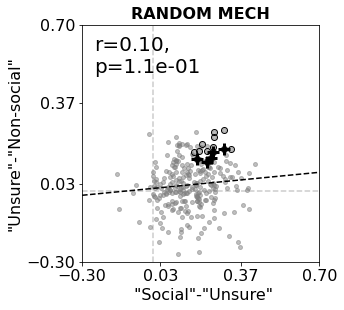

In [153]:

dims = [12,9.6]
fig= plt.figure(1,figsize = dims)

xymin,xymax = -.3,.7
    
#plt.suptitle('Mean differences: "Social" - "Nonsocial"',fontweight='bold')
ax = fig.add_subplot(221)
X,Y = meanDiff_sl_rand_S_UNS,meanDiff_sl_rand_UNS_NS
plot_fig(X,Y,' "Social"-"Unsure"', '"Unsure"-"Non-social"',xymin,xymax)
ax.set_aspect('equal')
#signodes
plt.plot(X[nodes_rand_SUNS_UNSNS_unc],Y[nodes_rand_SUNS_UNSNS_unc],mec='k',marker='o',mfc='none',ls='None')
plot_sig_nodes(X,Y,common_nodes_soc_uns_nonsoc)
#plt.plot(X[nodes_rand_SUNS_UNSNS_unc],Y[nodes_rand_SUNS_UNSNS_unc],mec='k',marker='o',mfc='none',ls='None')
#plt.title('RANDOM MECH')
#plt.legend(bbox_to_anchor = (1,1),fontsize =16)
plt.title('RANDOM MECH',fontweight='bold')

plt.xticks([np.round(i,2) for i in np.linspace(xymin*10,xymax*10,4)/10])
plt.yticks([np.round(i,2) for i in np.linspace(xymin*10,xymax*10,4)/10])


#plt.suptitle('Mean differences: "Social" - "Nonsocial"',fontweight='bold')
'''ax = fig.add_subplot(223)
X,Y = meanDiff_sl_rand_S_UNS,meanDiff_sl_rand_S_NS
plot_fig(X,Y,'"Social"-"Unsure"',' "Social"-"Non-social"',xymin,xymax)
ax.set_aspect('equal')
#signodes
plot_sig_nodes(X,Y,nodes_rand_SNS_SUNS)


plt.tight_layout()'''

plt.savefig(os.path.join(fig_save_loc,'rand/rand_soc_v_unsure_v_nonsoc_scatterplots.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')


## All movies, plot scatterplot and brainmaps : S>Unsure > NS

All movies: S v Unsure: -0.2966753093552454 0.6709717799474111
All movies: Unsure v BS: -0.2461222685631076 0.4047894793821669


 
0.09357 x + 0.05663


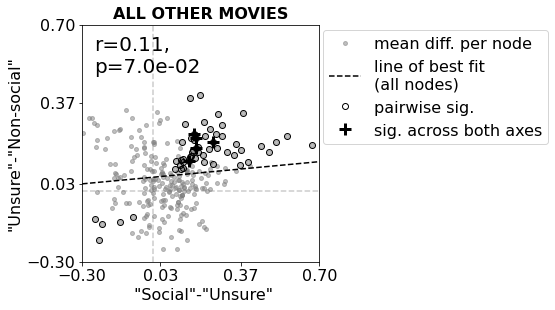

In [156]:
# scatterplot
dims = [12,9.6]
fig= plt.figure(1,figsize = dims)

xymin,xymax = -.3,.7
#plt.suptitle('Mean differences: "Social" - "Nonsocial"',fontweight='bold')
ax = fig.add_subplot(221)
X,Y = coef_soc_uns,coef_uns_nonsoc
plot_fig(X,Y,' "Social"-"Unsure"','"Unsure"-"Non-social"',xymin,xymax)
ax.set_aspect('equal')
#signodes
plt.plot(X[nodes_all_SUNS_UNSNS],Y[nodes_all_SUNS_UNSNS],mec='k',marker='o',mfc='none',ls='None',label = 'pairwise sig.')
plot_sig_nodes(X,Y,common_nodes_soc_uns_nonsoc)
#plt.plot(X[nodes_all_SUNS_UNSNS],Y[nodes_all_SUNS_UNSNS],mec='k',marker='o',mfc='none',ls='None')
plt.title('ALL OTHER MOVIES',fontweight='bold')
plt.legend(bbox_to_anchor = (2,1.01),fontsize =16)
plt.xlim(xymin,xymax)
plt.ylim(xymin,xymax)
plt.xticks([np.round(i,2) for i in np.linspace(-3,7,4)/10])
plt.yticks([np.round(i,2) for i in np.linspace(-3,7,4)/10])
plt.savefig(os.path.join(fig_save_loc,'all_movies/all_soc_v_unsure_v_nonsoc_scatterplots.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')




In [216]:
title_txt = 'ALL OTHER MOVIES'
print('All movies: S v Unsure:',min(coef_soc_uns),max(coef_soc_uns))
print('All movies: Unsure v BS:',min(coef_uns_nonsoc),max(coef_uns_nonsoc))

vmin,vmax =-.3,.67

All movies: S v Unsure: -0.2966753093552454 0.6709717799474111
All movies: Unsure v BS: -0.2461222685631076 0.4047894793821669


<Figure size 720x216 with 0 Axes>

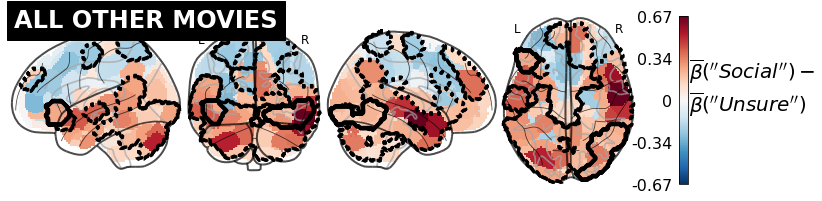

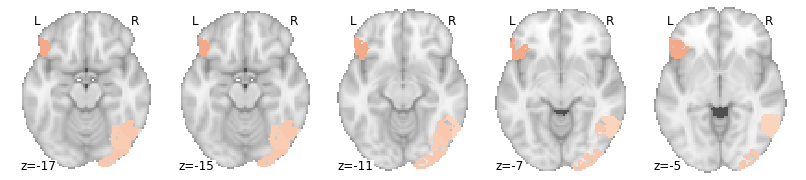

In [217]:
fig=plt.figure(1,figsize=((10,3)))
txt = r"$\overline{\beta}(''Social'')-$" + '\n' + r"$\overline{\beta}(''Unsure'')$"
img = roi_to_brain(pd.Series(coef_soc_uns), mask_x)
glassb = plot_glass_brain(img.to_nifti(),symmetric_cbar = True, title='ALL MOVIES', alpha=0.7, vmin=vmin,vmax= vmax, 
                display_mode='lyrz', plot_abs=False, black_bg=False,cmap = 'RdBu_r',colorbar = True)
glassb.title(title_txt,fontsize=24,bgcolor='k',color='w',fontweight='bold')
glassb._colorbar_ax.text(0.9,0.1,txt,fontsize=20,fontdict = {'verticalalignment':'center','rotation':0})#get_legend()
glassb.add_contours(color_rois(nodes_all_SUNS_UNSNS),linewidths=lw[0], colors=[cols[0]],linestyles='dotted')
glassb.add_contours(color_rois(common_nodes_soc_uns_nonsoc),linewidths=lw[0], colors=[cols[0]],linestyles='solid')
plt.savefig(os.path.join(fig_save_loc,'all_movies/social_v_unsure.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')

nodes = np.zeros((268,))
nodes[common_nodes_soc_uns_nonsoc] = coef_soc_uns[common_nodes_soc_uns_nonsoc]
img = roi_to_brain(pd.Series(nodes), mask_x)
#plot_glass_brain(img.to_nifti(),symmetric_cbar = False,
#                display_mode='lyrz', plot_abs=False, black_bg=False,cmap = 'RdBu_r',colorbar = True)
ax_plot = plot_stat_map(img.to_nifti(), display_mode='z', cut_coords=coords, cmap = 'RdBu_r',vmax=vmax,colorbar=False,annotate=True)
#ax_plot.title("ALL MOVIES",fontsize=24,bgcolor='k',color='w',fontweight='bold')
plt.savefig(os.path.join(fig_save_loc,'all_movies/social_v_unsure_axial.png'),dpi=600,bbox_inches='tight',facecolor='white', edgecolor='none')


<Figure size 720x216 with 0 Axes>

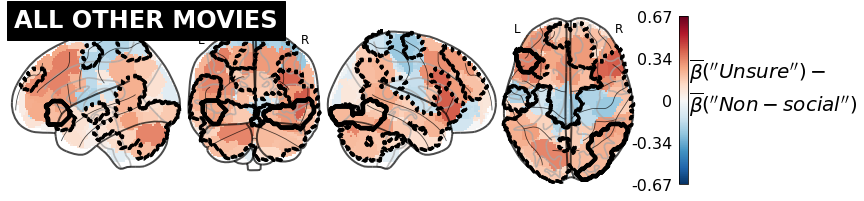

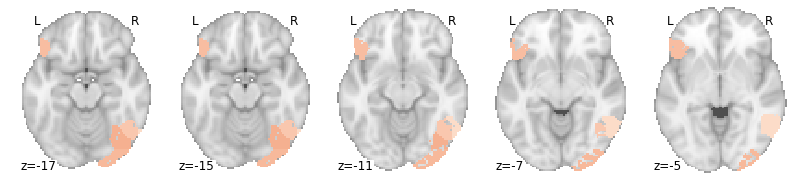

In [219]:
fig=plt.figure(1,figsize=((10,3)))
txt = r"$\overline{\beta}(''Unsure'')-$" + '\n' + r"$\overline{\beta}(''Non-social'')$"
img = roi_to_brain(pd.Series(coef_uns_nonsoc), mask_x)
glassb = plot_glass_brain(img.to_nifti(),symmetric_cbar = True, title='ALL MOVIES', alpha=0.7, vmin=vmin,vmax= vmax, 
                display_mode='lyrz', plot_abs=False, black_bg=False,cmap = 'RdBu_r',colorbar = True)
glassb.title(title_txt,fontsize=24,bgcolor='k',color='w',fontweight='bold')
glassb._colorbar_ax.text(0.9,0.1,txt,fontsize=20,fontdict = {'verticalalignment':'center','rotation':0})#get_legend()
glassb.add_contours(color_rois(nodes_all_SUNS_UNSNS),linewidths=lw[0], colors=[cols[0]],linestyles='dotted')
glassb.add_contours(color_rois(common_nodes_soc_uns_nonsoc),linewidths=lw[0], colors=[cols[0]],linestyles='solid')
plt.savefig(os.path.join(fig_save_loc,'all_movies/unsure_v_nonsocial.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')

nodes = np.zeros((268,))
nodes[common_nodes_soc_uns_nonsoc] = coef_uns_nonsoc[common_nodes_soc_uns_nonsoc]
img = roi_to_brain(pd.Series(nodes), mask_x)
#plot_glass_brain(img.to_nifti(),symmetric_cbar = False,
#                display_mode='lyrz', plot_abs=False, black_bg=False,cmap = 'RdBu_r',colorbar = True)
ax_plot = plot_stat_map(img.to_nifti(), display_mode='z', cut_coords=coords, cmap = 'RdBu_r',vmax=vmax,colorbar=False,annotate=True)
#ax_plot.title("ALL MOVIES",fontsize=24,bgcolor='k',color='w',fontweight='bold')
plt.savefig(os.path.join(fig_save_loc,'all_movies/unsure_v_nonsocial_axial.png'),dpi=600,bbox_inches='tight',facecolor='white', edgecolor='none')



# Unsure > sure

### 1.  Random Mech

In [170]:
movie_ind = 4
coef_slope_rand = np.load(os.path.join(data_file_loc,'coef_slopereg_runnorm_Random mechanical.npy'))

soc_inds = responses[:,movie_ind]==1 # subs who responded "social"
nonsoc_inds = responses[:,movie_ind]==0 # subs who respoded "nonsocial"
unsure_inds = responses[:,movie_ind]==9 # subs who respoded "unsure"

_,pval_slope_rand_unsure_sure_unc = stats.ttest_ind(coef_slope_rand[unsure_inds,:],coef_slope_rand[soc_inds|nonsoc_inds,:], axis=0, equal_var=False)
pval_slope_rand_unsure_sure = lsu(pval_slope_rand_unsure_sure_unc,q=.05)#fdr_correction(pval_slope_rand,.05)
meanDiff_sl_rand_unsure_sure = np.nanmean(coef_slope_rand[unsure_inds,:],axis=0)-np.nanmean(coef_slope_rand[soc_inds|nonsoc_inds,:],axis=0)

pval_slope_rand_unsure_sure_unc = pval_slope_rand_unsure_sure_unc<.05

print('unc.:',len(np.where(pval_slope_rand_unsure_sure_unc)[0]))
print('corr.:',len(np.where(pval_slope_rand_unsure_sure)[0]))


unc.: 37
corr.: 0


In [171]:
all_coefs = np.zeros((1048,268,10))

for m in range(10):
    fileName =  os.path.join(data_file_loc,f'coef_slopereg_trialnorm_{vidnames[m]}.npy')
    all_coefs[:,:,m] = np.load(fileName)
    #print(dat.shape)

In [172]:
# initializing arrays
coef_unsure_sure = np.empty((268,))
coef_unsure_sure[:]  = np.nan

pval_unsure_sure = np.empty((268,))
pval_unsure_sure[:]= np.nan

start_time =  time.time()
for n in range(268):
    if n%10 == 0:
        print(f'node {n+1},time={(time.time()-start_time)/60:.2f} mins')
    df = pd.DataFrame(columns = ['coefs','response','subID','movie'])
    for m in other_movies:
        df_temp = pd.DataFrame({'coefs': all_coefs[subs_10resp,n,m],'response':responses[subs_10resp,m], 'subID':subs_10resp, 'movie':np.repeat(m,len(subs_10resp))})
        df = df.append(df_temp,ignore_index=True)
    
    df['uncertainty'] = ['Uncertain' if i == 9 else 'Certain' for i in df['response'].values]
        
    model = Lmer('coefs ~  uncertainty + (1|subID)', data=df) # ff: mean response, rf:subjID
    #print('model 4:',model.fit())
    model.fit(factors={"uncertainty":["Certain","Uncertain"]},summary = False, verbose = False)
    if n == 0:
        print(model.fit(factors={"uncertainty":["Certain","Uncertain"]}))
    #model.fit(summary = False, verbose = False)
    coef_unsure_sure[n] = model.coefs['Estimate'][1]
    pval_unsure_sure[n]= model.coefs['P-val'][1]



node 1,time=0.00 mins
Formula: coefs~uncertainty+(1|subID)

Family: gaussian	 Inference: parametric

Number of observations: 7326	 Groups: {'subID': 814.0}

Log-likelihood: -9423.375 	 AIC: 18846.750

Random effects:

                 Name    Var    Std
subID     (Intercept)  0.065  0.255
Residual               0.717  0.847

No random effect correlations specified

Fixed effects:

              Estimate  2.5_ci  97.5_ci     SE        DF  T-stat  P-val  Sig
(Intercept)      0.340   0.313    0.366  0.014   851.910  25.161  0.000  ***
uncertainty1    -0.078  -0.176    0.020  0.050  7257.694  -1.564  0.118     
node 11,time=0.07 mins
node 21,time=0.14 mins
node 31,time=0.21 mins
node 41,time=0.29 mins
node 51,time=0.38 mins
node 61,time=0.48 mins
node 71,time=0.55 mins
node 81,time=0.63 mins
node 91,time=0.70 mins
node 101,time=0.77 mins
node 111,time=0.85 mins
node 121,time=0.91 mins
node 131,time=0.99 mins
node 141,time=1.06 mins
node 151,time=1.13 mins
node 161,time=1.20 mins
node 171,t

In [173]:
pval_unsure_sure1 = lsu(pval_unsure_sure,q=.05)
len(np.where(pval_unsure_sure1)[0])

58

### Plot brainmaps and scatterplots for all movies' analyses

## Unsure > Sure

In [174]:
all_nodes_unsure_greaterthan_sure = pval_unsure_sure1 & (coef_unsure_sure>0)
len(np.where(all_nodes_unsure_greaterthan_sure)[0])


22

In [175]:
rand_nodes_unsure_greaterthan_sure = pval_slope_rand_unsure_sure_unc & (meanDiff_sl_rand_unsure_sure>0)
len(np.where(rand_nodes_unsure_greaterthan_sure)[0])

16

In [176]:
common_nodes = rand_nodes_unsure_greaterthan_sure & all_nodes_unsure_greaterthan_sure
len(np.where(common_nodes)[0])

4

## all movies unsure v sure

In [ ]:
coords = [np.round(eval(shen268_lbl[str(n+1)][0])['coords'][2]) for n in np.where(common_nodes)[0]]
coords

-0.3153409425396632 0.28727461327102516


<Figure size 720x216 with 0 Axes>

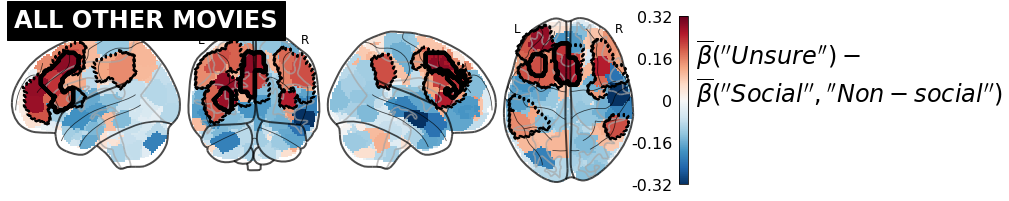

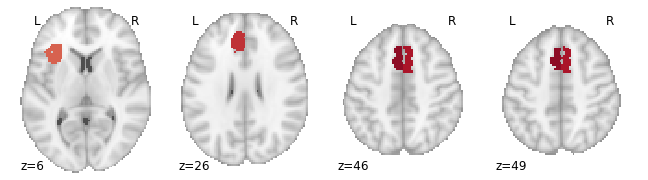

In [196]:

vmin,vmax = min(coef_unsure_sure),max(coef_unsure_sure)
print(vmin,vmax)
vmax = .32

fig=plt.figure(1,figsize=((10,3)))
txt = r"$\overline{\beta}(''Unsure'')-$" + '\n' + r"$\overline{\beta}(''Social'',''Non-social'')$"
img = roi_to_brain(pd.Series(coef_unsure_sure), mask_x)
glassb = plot_glass_brain(img.to_nifti(),symmetric_cbar = True, title='ALL MOVIES', alpha=0.7, vmin=vmin,vmax= vmax, 
                display_mode='lyrz', plot_abs=False, black_bg=False,cmap = 'RdBu_r',colorbar = True)
glassb.title("ALL OTHER MOVIES",fontsize=24,bgcolor='k',color='w',fontweight='bold')
glassb._colorbar_ax.text(0.9,0.1,txt,fontsize=24,fontdict = {'verticalalignment':'center','rotation':0})#get_legend()
glassb.add_contours(color_rois(all_nodes_unsure_greaterthan_sure),linewidths=lw[1], colors=[cols[1]],linestyles='dotted')
glassb.add_contours(color_rois(common_nodes),linewidths=lw[0], colors=[cols[0]],linestyles='solid')
plt.savefig(os.path.join(fig_save_loc,'all_movies/unsure_v_sure.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')

nodes = np.zeros((268,))
#nodes[all_nodes_unsure_greaterthan_sure] = coef_unsure_sure[all_nodes_unsure_greaterthan_sure]
nodes[common_nodes] = coef_unsure_sure[common_nodes]
img = roi_to_brain(pd.Series(nodes), mask_x)
#plot_glass_brain(img.to_nifti(),symmetric_cbar = False,
#                display_mode='lyrz', plot_abs=False, black_bg=False,cmap = 'RdBu_r',colorbar = True)
ax_plot = plot_stat_map(img.to_nifti(), display_mode='z', cut_coords=coords, cmap = 'RdBu_r',vmax=vmax,colorbar=False,annotate=True)
#ax_plot.title("ALL OTHER MOVIES",fontsize=24,bgcolor='k',color='w',fontweight='bold')
plt.savefig(os.path.join(fig_save_loc,'all_movies/unsure_v_sure_axial.png'),dpi=600,bbox_inches='tight',facecolor='white', edgecolor='none')



[49.0, 46.0, 6.0, 26.0]

-0.25569206967788705 0.20894016749339483


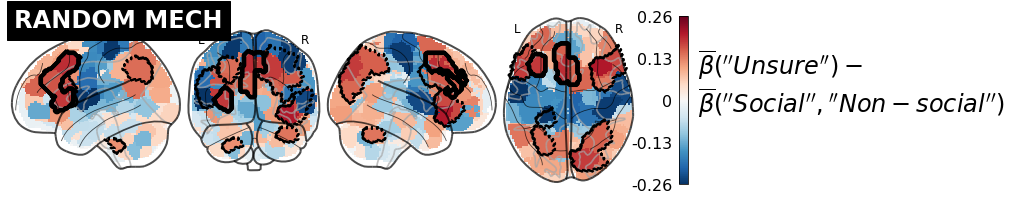

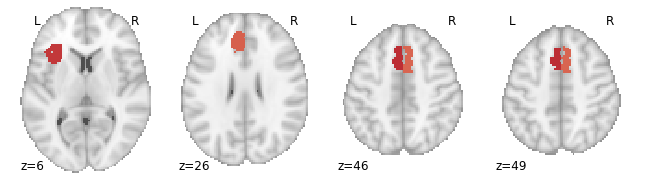

In [195]:

vmin,vmax = min(meanDiff_sl_rand_unsure_sure),max(meanDiff_sl_rand_unsure_sure)
print(vmin,vmax)
vmax = .26

txt = r"$\overline{\beta}(''Unsure'')-$" +'\n'+ r"$\overline{\beta}(''Social'',''Non-social'')$"
#txt = 'RANDOM MECH [' + r'$\overline{\beta}_{social}-\overline{\beta}_{nonsocial}$' + ']'
#img.plot(colorbar=True, title = txt,cmap = 'RdBu_r',symmetric_cbar = False)
img = roi_to_brain(pd.Series(meanDiff_sl_rand_unsure_sure), mask_x)
glassb = plot_glass_brain(img.to_nifti(), symmetric_cbar = True, title = 'RANDOM MECH',
                display_mode='lyrz', plot_abs=False, black_bg=False,cmap = 'RdBu_r',colorbar = True,vmax=vmax)
glassb.title("RANDOM MECH",fontsize=24,bgcolor='k',color='w',fontweight='bold')
glassb._colorbar_ax.text(0.9,0.05,txt,fontsize=24,fontdict = {'verticalalignment':'center','rotation':0})#get_legend()
#glassb.title(txt,fontsize=24,bgcolor='k',color='w',fontweight='bold')
glassb.add_contours(color_rois(rand_nodes_unsure_greaterthan_sure),linewidths=lw[1], colors=[cols[1]],linestyles='dotted')
glassb.add_contours(color_rois(common_nodes),linewidths=lw[0], colors=[cols[0]],linestyles='solid')
plt.savefig(os.path.join(fig_save_loc,'rand/unsure_v_sure.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')

nodes = np.zeros((268,))
#nodes[rand_nodes_unsure_greaterthan_sure] = meanDiff_sl_rand_unsure_sure[rand_nodes_unsure_greaterthan_sure]
nodes[common_nodes] = meanDiff_sl_rand_unsure_sure[common_nodes]
img = roi_to_brain(pd.Series(nodes), mask_x)
#plot_glass_brain(img.to_nifti(),symmetric_cbar = False,
#                display_mode='lyrz', plot_abs=False, black_bg=False,cmap = 'RdBu_r',colorbar = True)
ax_plot = plot_stat_map(img.to_nifti(), display_mode='z', cut_coords=coords, vmax = vmax,cmap = 'RdBu_r',colorbar=False,annotate=True)
#ax_plot.title("RANDOM MECH",fontsize=24,bgcolor='k',color='w',fontweight='bold')
plt.savefig(os.path.join(fig_save_loc,'rand/unsure_v_sure_axial.png'),dpi=600,bbox_inches='tight',facecolor='white', edgecolor='none')



In [188]:
np.where(common_nodes)[0]

array([ 27, 149, 154, 218])

In [191]:
eval(shen268_lbl[str(27+1)][0])['coords'][2]

48.63713080168776

In [192]:
rois = [eval(shen268_lbl[str(n+1)][0])['coords'][2] for n in np.where(common_nodes)[0]]
for i,n in enumerate(rois):
    print(np.where(common_nodes)[0][i],n)
print(f'{len(rois)} ROIs sig. at p-value threshold .05\n')

27 48.63713080168776
149 46.21328671328672
154 5.882562277580064
218 26.288065843621396
4 ROIs sig. at p-value threshold .05



In [187]:
rois = [eval(shen268_lbl[str(n+1)][0])['name'] for n in np.where(common_nodes)[0]]
for i,n in enumerate(rois):
    print(np.where(common_nodes)[0][i],n)
print(f'{len(rois)} ROIs sig. at p-value threshold .05\n')

27 41.56% Paracingulate_Gyrus; 27.43% Superior_Frontal_Gyrus; 21.52% Juxtapositional_Lobule_Cortex_(formerly_Supplementary_Motor_Cortex); 9.49% Cingulate_Gyrus_anterior_division
149 59.27% Paracingulate_Gyrus; 30.42% Superior_Frontal_Gyrus; 6.82% Juxtapositional_Lobule_Cortex_(formerly_Supplementary_Motor_Cortex)
154 41.28% Frontal_Operculum_Cortex; 40.39% Insular_Cortex; 12.28% Frontal_Orbital_Cortex; 5.69% Inferior_Frontal_Gyrus_pars_triangularis
218 63.37% Paracingulate_Gyrus; 30.73% Cingulate_Gyrus_anterior_division; 5.90% Superior_Frontal_Gyrus
4 ROIs sig. at p-value threshold .05



In [ ]:
dims = [10,8]
fig= plt.figure(1,figsize = dims)

xymin,xymax = -.4,.8
ax = fig.add_subplot(221) #meanDiff_sl_rand_unsure_sure[rand_nodes_unsure_greaterthan_surea]
X,Y = meanDiff_sl_rand_unsure_sure,coef_unsure_sure
plot_fig(X,Y,' RANDOM MECH"','"ALL MOVIES"',xymin,xymax)
ax.set_aspect('equal')
#signodes
plot_sig_nodes(X,Y,nodes_all_SUNS_UNSNS)
#plt.plot(X[nodes_all_SUNS_UNSNS],Y[nodes_all_SUNS_UNSNS],mec='k',marker='o',mfc='none',ls='None')
plt.title('"Unsure" vs. ["Social","Non-social"]')
plt.legend(bbox_to_anchor = (2.2,1.01),fontsize =16)
plt.savefig(os.path.join(fig_save_loc,'/rand_v_all_scatterplots.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')



# extra code

In [ ]:
from multipy.fdr import lsu
#from multipy.data import neuhaus

significant_pvals = lsu(np.array(x), q=0.01)
#print(zip(['{:.4f}'.format(p) for p in x], significant_pvals))
significant_pvals

In [ ]:
nodes = np.zeros((268,))
nodes[pval_slope_coaxbill] = meanDiff_sl_coaxbill[pval_slope_coaxbill]
img = roi_to_brain(pd.Series(nodes), mask_x)
plot_glass_brain(img.to_nifti(),symmetric_cbar = False,
                display_mode='lyrz', plot_abs=False, black_bg=False,cmap = 'RdBu_r',colorbar = True)


img = roi_to_brain(pd.Series(meanDiff_sl_coaxbill), mask_x)
#txt = 'COAX-BILL [' + r'$\overline{\beta_{social}-{\beta}_{nonsocial}}$' + ']'
txt = r'$\overline{\beta_{social}-{\beta}_{nonsocial}}$'
#txt = f"COAXBILL"
#img.plot(colorbar=True, title = txt,cmap = 'RdBu_r',symmetric_cbar = False)
#img = roi_to_brain(pd.Series(earliest_pt-max(earliest_pt)), mask_x)
glassb = plot_glass_brain(img.to_nifti(),title = txt, symmetric_cbar = False,
                display_mode='lyrz', plot_abs=False, black_bg=False,cmap = 'RdBu_r',colorbar = True)
glassb.title(txt,fontsize=24,bgcolor='k',color='w',fontweight='bold')
glassb.add_contours(color_rois(pval_slope_coaxbill),linewidths=lw[1], colors=[cols[1]],linestyle='dashed')
glassb.add_contours(color_rois(nodes_coaxbill_rand_all),linewidths=lw[0], colors=[cols[0]],linestyle='dashed')
#glassb.add_contours(color_rois(nodes_coaxbill_rand_all_fish),linewidths=lw[2], colors=[cols[2]],filled=True,linestyle='dashed')



In [ ]:
### fish
# same movie: fish

movie_ind = 3

soc_inds = responses[:,movie_ind]==1 # subs who responded "social"
nonsoc_inds = responses[:,movie_ind]==0 # subs who respoded "nonsocial"

print(f'movie={vid_joined[movie_ind]},soc={len(np.where(soc_inds)[0])},nonsocial={len(np.where(nonsoc_inds)[0])}')

# ttest between slope regs yes vs. no
_,pval_slope_fish = stats.ttest_ind(coef_slope_fish[soc_inds,:], coef_slope_fish[nonsoc_inds,:],axis=0, equal_var=False)
meanDiff_sl_fish = np.nanmean(coef_slope_fish[soc_inds,:],axis=0)-np.nanmean(coef_slope_fish[nonsoc_inds,:],axis=0)

#fdr correction
#_,pval_slope_fish = fdr_correction(pval_slope_fish,.05)
pval_slope_fish = lsu(pval_slope_fish,q=.05)

dirn_fish = np.empty((268,))
count=0
for n in range(268):
    if np.abs(np.nanmean(coef_slope_fish[soc_inds,n],axis=0)) > np.abs(np.nanmean(coef_slope_fish[nonsoc_inds,n],axis=0)):
        dirn_fish[n] = 1
    elif np.abs(np.nanmean(coef_slope_fish[soc_inds,n],axis=0)) < np.abs(np.nanmean(coef_slope_fish[nonsoc_inds,n],axis=0)):
        dirn_fish[n] = -1
    else:
        dirn_fish[n] = 0

In [ ]:
## all movies t-tests (doesn't consider shared variance between subs - but good to get an initial impression)

coef_trial_resh_yes = []
coef_trial_resh_unsure = []
coef_trial_resh_no = []

for m in range(10):
    fileName =  os.path.join(data_file_loc,f'coef_slopereg_trialnorm_{vidnames[m]}.npy')
    coefs_ = np.load(fileName)
    #print(dat.shape)
    coef_trial_resh_yes.append(coefs_[responses[:,m]==1,:])# subsm * 268 * nt0
    coef_trial_resh_no.append(coefs_[responses[:,m]==0,:])# subsm * 268 * nt1
    coef_trial_resh_unsure.append(coefs_[responses[:,m]==9,:])# subsm * 268 * nt2

coef_trial_resh_yes = np.concatenate(coef_trial_resh_yes,axis=0)
coef_trial_resh_no = np.concatenate(coef_trial_resh_no,axis=0)
coef_trial_resh_unsure = np.concatenate(coef_trial_resh_unsure,axis=0)
print('Across movies: \n\tyes:'+ str(coef_trial_resh_yes.shape) + ',no:' + str(coef_trial_resh_no.shape)+ ',unsure:' + str(coef_trial_resh_unsure.shape))


# ttest between slope regs yes vs. no
_,pval_slope_all_S_NS = stats.ttest_ind(coef_trial_resh_yes, coef_trial_resh_no, axis=0, equal_var=False)
pval_slope_all_S_NS = lsu(pval_slope_all_S_NS,q=.05)#fdr_correction(pval_slope_rand,.05)
meanDiff_sl_all_S_NS = np.nanmean(coef_trial_resh_yes,axis=0)-np.nanmean(coef_trial_resh_no,axis=0)

# ttest between slope regs yes vs. unsure
_,pval_slope_all_S_UNS = stats.ttest_ind(coef_trial_resh_yes, coef_trial_resh_unsure, axis=0, equal_var=False)
pval_slope_all_S_UNS = lsu(pval_slope_all_S_UNS,q=.05)#fdr_correction(pval_slope_rand,.05)
meanDiff_sl_all_S_UNS = np.nanmean(coef_trial_resh_yes,axis=0)-np.nanmean(coef_trial_resh_unsure,axis=0)

# ttest between slope regs unsure vs. no
_,pval_slope_all_UNS_NS_unc = stats.ttest_ind(coef_trial_resh_unsure, coef_trial_resh_no,axis=0, equal_var=False)
pval_slope_all_UNS_NS = lsu(pval_slope_all_UNS_NS_unc,q=.05)#fdr_correction(pval_slope_rand,.05)
meanDiff_sl_all_UNS_NS = np.nanmean(coef_trial_resh_unsure,axis=0)-np.nanmean(coef_trial_resh_no,axis=0)

#pval_slope_all_UNS_NS_unc = pval_slope_all_UNS_NS_unc<.05


_,pval_slope_all_unsure_sure = stats.ttest_ind(coef_trial_resh_unsure,np.concatenate((coef_trial_resh_yes,coef_trial_resh_no)), axis=0, equal_var=False)
pval_slope_all_unsure_sure = lsu(pval_slope_all_unsure_sure,q=.05)#fdr_correction(pval_slope_rand,.05)
meanDiff_sl_all_unsure_sure = np.nanmean(coef_trial_resh_unsure,axis=0)-np.nanmean(np.concatenate((coef_trial_resh_yes,coef_trial_resh_no)),axis=0)


In [ ]:
# social>unsure and unsure>non-social or vice-versa
nodes_all_SUNS_UNSNS = (pval_slope_all_S_UNS) & (pval_slope_all_UNS_NS) & (np.sign(meanDiff_sl_all_S_UNS) == np.sign(meanDiff_sl_all_UNS_NS)) 
len(np.where(nodes_all_SUNS_UNSNS)[0])


print('All movies: S v Unsure:',min(meanDiff_sl_all_S_UNS),max(meanDiff_sl_all_S_UNS))
print('All movies: Unsure v BS:',min(meanDiff_sl_all_UNS_NS),max(meanDiff_sl_all_UNS_NS))


In [ ]:
nodes = np.zeros((268,))
nodes[pval_slope_all_S_UNS] = meanDiff_sl_all_S_UNS[pval_slope_all_S_UNS]
img = roi_to_brain(pd.Series(nodes), mask_x)
plot_glass_brain(img.to_nifti(),symmetric_cbar = True, vmin=vmin,vmax= vmax,
                display_mode='lyrz', plot_abs=False, black_bg=False,cmap = 'RdBu_r',colorbar = True)

nodes = np.zeros((268,))
nodes[pval_slope_all_UNS_NS] = meanDiff_sl_all_UNS_NS[pval_slope_all_UNS_NS]
img = roi_to_brain(pd.Series(nodes), mask_x)
plot_glass_brain(img.to_nifti(),symmetric_cbar = True, vmin=vmin,vmax=vmax,
                display_mode='lyrz', plot_abs=False, black_bg=False,cmap = 'RdBu_r',colorbar = True)


In [ ]:
fig=plt.figure(1,figsize=((10,3)))
txt = r"$\overline{\beta}(''Social'')-$" + '\n' + r"$\overline{\beta}(''Unsure'')$"
#txt = 'RANDOM MECH [' + r'$\overline{\beta}_{social}-\overline{\beta}_{nonsocial}$' + ']'
#img.plot(colorbar=True, title = txt,cmap = 'RdBu_r',symmetric_cbar = False)
img = roi_to_brain(pd.Series(meanDiff_sl_all_S_UNS), mask_x)
glassb = plot_glass_brain(img.to_nifti(),symmetric_cbar = True, title='ALL MOVIES', alpha=0.7, vmin=vmin,vmax= vmax, 
                display_mode='lyrz', plot_abs=False, black_bg=False,cmap = 'RdBu_r',colorbar = True)
glassb.title("ALL MOVIES",fontsize=24,bgcolor='k',color='w',fontweight='bold')
glassb._colorbar_ax.text(0.9,0.1,txt,fontsize=20,fontdict = {'verticalalignment':'center','rotation':0})#get_legend()
#glassb._colorbar_ax.set_title(txt,fontsize=20)#get_legend()
#glassb.title(txt,fontsize=24,bgcolor='k',color='w',fontweight='bold')
#glassb.add_contours(color_rois(pval_slope_all_S_UNS),linewidths=lw[1], colors=[cols[1]],linestyles='dotted')
glassb.add_contours(color_rois(nodes_all_SUNS_UNSNS),linewidths=lw[0], colors=[cols[0]],linestyles='solid')
plt.savefig(os.path.join(fig_save_loc,'all_movies/social_v_unsure.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')

fig=plt.figure(2,figsize=((10,3)))
nodes = np.zeros((268,))
nodes[nodes_all_SUNS_UNSNS] = meanDiff_sl_all_S_UNS[nodes_all_SUNS_UNSNS]
img = roi_to_brain(pd.Series(nodes), mask_x)
output_file = os.path.join(fig_save_loc,'all_movies/social_v_unsure_axial.png')
plot_stat_map(img.to_nifti(), display_mode='z', cut_coords=10*np.arange(-4,6,2), cmap = 'RdBu_r',vmax=vmax,colorbar=False,annotate=True)
plt.savefig(output_file,dpi=600,bbox_inches='tight',facecolor='white', edgecolor='none')



fig=plt.figure(3,figsize=((10,3)))
txt = r"$\overline{\beta}(''Unsure'')-$" + '\n' + r"$\overline{\beta}(''Non-social'')$"
#txt = 'RANDOM MECH [' + r'$\overline{\beta}_{social}-\overline{\beta}_{nonsocial}$' + ']'
#img.plot(colorbar=True, title = txt,cmap = 'RdBu_r',symmetric_cbar = False)
img = roi_to_brain(pd.Series(meanDiff_sl_all_UNS_NS), mask_x)
glassb = plot_glass_brain(img.to_nifti(),symmetric_cbar = True, title='ALL MOVIES', vmin=vmin,vmax= vmax,
                display_mode='lyrz', plot_abs=False, black_bg=False,cmap = 'RdBu_r',colorbar = True)
glassb.title("ALL MOVIES",fontsize=24,bgcolor='k',color='w',fontweight='bold')
glassb._colorbar_ax.text(0.9,0.1,txt,fontsize=20,fontdict = {'verticalalignment':'center','rotation':0})#get_legend()
#glassb._colorbar_ax.set_title(txt,fontsize=20)#get_legend()
#glassb.title(txt,fontsize=24,bgcolor='k',color='w',fontweight='bold')
#glassb.add_contours(color_rois(pval_slope_all_UNS_NS),linewidths=lw[1], colors=[cols[1]],linestyles='dotted')
glassb.add_contours(color_rois(nodes_all_SUNS_UNSNS),linewidths=lw[0], colors=[cols[0]],linestyles='solid')
plt.savefig(os.path.join(fig_save_loc,'all_movies/unsure_v_nonsocial.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')

fig=plt.figure(4,figsize=((10,3)))
nodes = np.zeros((268,))
nodes[nodes_all_SUNS_UNSNS] = meanDiff_sl_all_UNS_NS[nodes_all_SUNS_UNSNS]
img = roi_to_brain(pd.Series(nodes), mask_x)
output_file = os.path.join(fig_save_loc,'all_movies/unsure_v_nonsocial_axial.png')
plot_stat_map(img.to_nifti(), display_mode='z', cut_coords=10*np.arange(-4,6,2), cmap = 'RdBu_r',vmax=vmax,colorbar=False,annotate=True)
plt.savefig(output_file,dpi=600,bbox_inches='tight',facecolor='white', edgecolor='none')




In [ ]:
nodes_all_UNS_SURE= (pval_slope_all_S_NS) & (pval_slope_all_UNS_NS) &(~pval_slope_all_S_NS) & (np.sign(meanDiff_sl_all_S_UNS) == -1) & (np.sign(meanDiff_sl_all_UNS_NS)==1) 
len(np.where(nodes_all_UNS_SURE)[0])

# social>nonsocial and social>unsure or vice-versas

In [ ]:

fig = plot_glass_brain(img.to_nifti(),title = txt, symmetric_cbar = False,
                display_mode='lyrz', plot_abs=False, black_bg=False,cmap = 'RdBu_r',colorbar = True,vmin=-.22,vmax=.55)
#fig._show_colorbar(plt.get_cmap('RdBu_r'), MidpointNormalize(midpoint=0., vmin=cmin, vmax=cmax))
#box = fig._colorbar_ax.get_position()
#total_cols=5
#fig._colorbar_ax.set_p9osition([box.x0+(box.x0*0.1/total_cols), box.y0, box.width, box.height])  # move a bit the bar to the right, need to divide by number of columns (to move relative to last figure only, not to overall row, else will get too far away)
#fig._colorbar_ax.set_label('xxxxxxxxxxxx')
fig._colorbar_ax.set_title('xx')#get_legend()
fig._colorbar_ax.set_xticklabels({-1:'-1',0:'0',1:'1'})#get_legend()

ax = plt.gcf().axes[5].axis() #plt.gcf().axes[i].set_label('abc'+str(i))# rmatter(ticker.FormatStrFormatter("%i")))
plt.gcf().axes[5].axis()


In [ ]:
# looks weird.. so sanity checks

nodes = np.zeros((268,))
nodes[nodes_all_SUNS_UNSNS] = meanDiff_sl_all_S_UNS[nodes_all_SUNS_UNSNS]
img = roi_to_brain(pd.Series(nodes), mask_x)
plot_glass_brain(img.to_nifti(),symmetric_cbar = False,
                display_mode='lyrz', plot_abs=False, black_bg=False,cmap = 'RdBu_r',colorbar = True)

nodes = np.zeros((268,))
nodes[nodes_all_SUNS_UNSNS] = meanDiff_sl_all_UNS_NS[nodes_all_SUNS_UNSNS]
img = roi_to_brain(pd.Series(nodes), mask_x)
plot_glass_brain(img.to_nifti(),symmetric_cbar = False,
                display_mode='lyrz', plot_abs=False, black_bg=False,cmap = 'RdBu_r',colorbar = True)


In [ ]:
nodes=  np.zeros((268,))
nodes[pval_slope_all_unsure_sure] = meanDiff_sl_all_unsure_sure[pval_slope_all_unsure_sure]
img = roi_to_brain(pd.Series(nodes), mask_x)
img.plot(colorbar=True,cmap = 'RdBu_r',title='ALL MOVIES', symmetric_cbar = False)


txt = r'$\overline{\beta}_{unsure}-\overline{\beta}_{social,nonsocial}$'
#txt = 'RANDOM MECH [' + r'$\overline{\beta}_{social}-\overline{\beta}_{nonsocial}$' + ']'
#img.plot(colorbar=True, title = txt,cmap = 'RdBu_r',symmetric_cbar = False)
img = roi_to_brain(pd.Series(meanDiff_sl_all_unsure_sure), mask_x)
glassb = plot_glass_brain(img.to_nifti(),symmetric_cbar = False, title='ALL MOVIES', 
                display_mode='lyrz', plot_abs=False, black_bg=False,cmap = 'RdBu_r',colorbar = True)
glassb._colorbar_ax.set_title(txt,fontsize=20)#get_legend()
#glassb.title(txt,fontsize=24,bgcolor='k',color='w',fontweight='bold')
#glassb.add_contours(color_rois(pval_slope_all_S_UNS),linewidths=lw[1], colors=[cols[1]],linestyles='dotted')
glassb.add_contours(color_rois(pval_slope_all_unsure_sure),linewidths=lw[0], colors=[cols[0]],linestyles='solid')




plt.hist(meanDiff_sl_all_unsure_sure,bins=20,color='grey')
plt.xlabel(r'$\overline{\beta}_{unsure}>\overline{\beta}_{social,nonsocial}$')
plt.ylabel('Number of nodes')
ymin,ymax=plt.ylim()
plt.vlines(np.nanmean(meanDiff_sl_all_unsure_sure),ymin,ymax,color='k',label='Mean')
plt.legend()
plt.title('ALL MOVIES')

In [ ]:
plt.hist(meanDiff_sl_rand_unsure_sure,bins=20,color='grey')
plt.xlabel(r'$\overline{\beta}_{unsure}>\overline{\beta}_{social,nonsocial}$')
plt.ylabel('Number of nodes')
ymin,ymax=plt.ylim()
plt.vlines(np.nanmean(meanDiff_sl_rand_unsure_sure),ymin,ymax,color='k',label='Mean')
plt.legend()
plt.title('RANDOM MECH')